In [2]:
import FinanceDataReader as fdr

In [3]:
from datetime import datetime, timedelta

def get_stock_history(symbol, duration=30):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=duration)
    df = fdr.DataReader(symbol, start_date, end_date)
    return df.to_csv()

df = get_stock_history('AAPL', 30)
df


'Date,Open,High,Low,Close,Adj Close,Volume\n2024-02-12,188.419998,188.669998,186.789993,187.149994,187.149994,41781900\n2024-02-13,185.770004,186.210007,183.509995,185.039993,185.039993,56529500\n2024-02-14,185.320007,185.529999,182.440002,184.149994,184.149994,54630500\n2024-02-15,183.550003,184.490005,181.350006,183.860001,183.860001,65434500\n2024-02-16,183.419998,184.850006,181.669998,182.309998,182.309998,49701400\n2024-02-20,181.789993,182.429993,180.0,181.559998,181.559998,53665600\n2024-02-21,181.940002,182.889999,180.660004,182.320007,182.320007,41529700\n2024-02-22,183.479996,184.960007,182.460007,184.369995,184.369995,52292200\n2024-02-23,185.009995,185.039993,182.229996,182.520004,182.520004,45119700\n2024-02-26,182.240005,182.759995,180.649994,181.160004,181.160004,40867400\n2024-02-27,181.100006,183.919998,179.559998,182.630005,182.630005,54318900\n2024-02-28,182.509995,183.119995,180.130005,181.419998,181.419998,48953900\n2024-02-29,181.270004,182.570007,179.529999,180.7

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import tempfile
import os
from fastapi.responses import FileResponse
from IPython.display import Image, display

# 차트 생성
def get_stock_history(symbol, duration=30):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=duration)
    df = fdr.DataReader(symbol, start_date, end_date)
    # return df.to_csv()
    
    # 차트 생성
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['Close'], label='Close')
    plt.title(f'{symbol} Close Price Chart')    

    # 임시 파일로 차트 저장
    with tempfile.NamedTemporaryFile(delete=False, suffix='.png') as tmpfile:
        plt.savefig(tmpfile.name)
        plt.close()  # 리소스 해제

    # 차트 이미지 파일 반환
    return FileResponse(path=tmpfile.name, filename=f"{symbol}_chart.png", media_type='image/png')

chart = get_stock_history('AAPL')
# display(Image(chart.file))



In [5]:
end_date = datetime.now()
start_date = end_date - timedelta(days=30)
symbol = 'AAPL'
df = fdr.DataReader(symbol, start_date, end_date)


# # 차트 생성
# plt.figure(figsize=(10, 5))
# plt.plot(df.index, df['Close'], label='Close')
# plt.title(f'{symbol} Close Price Chart')

# # 임시 파일로 차트 저장
# with tempfile.NamedTemporaryFile(delete=False, suffix='.png') as tmpfile:
#     plt.savefig(tmpfile.name)
#     plt.close()  # 리소스 해제

# # 차트 이미지 파일 반환
# FileResponse(path=tmpfile.name, filename=f"{symbol}_chart.png", media_type='image/png')


TypeError: candlestick_ohlc() got multiple values for argument 'colorup'

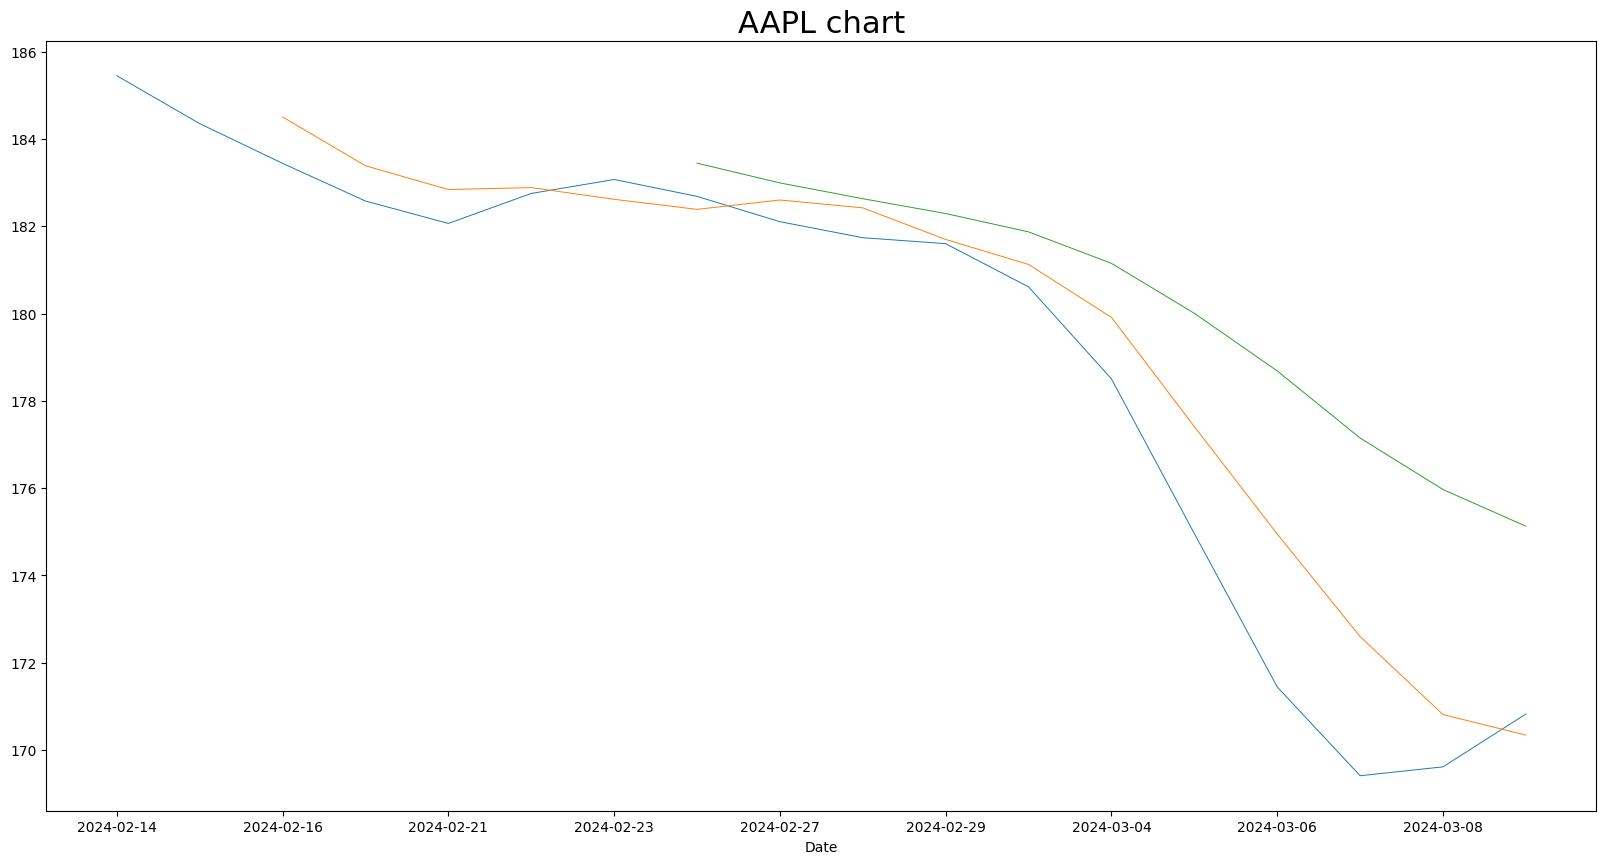

In [6]:
import matplotlib.ticker as ticker
from mplfinance.original_flavor import candlestick_ohlc

end_date = datetime.now()
start_date = end_date - timedelta(days=30)
symbol = 'AAPL'
df = fdr.DataReader(symbol, start_date, end_date)

df['MA3'] = df['Close'].rolling(window=3).mean()
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
index = df.index.astype('str') # 캔들스틱 x축이 str로 들어감

# 이동평균선 그리기
ax.plot(index, df['MA3'], label='MA3', linewidth=0.7)
ax.plot(index, df['MA5'], label='MA5', linewidth=0.7)
ax.plot(index, df['MA10'], label='MA10', linewidth=0.7)

# X축 티커 숫자 20개로 제한
ax.xaxis.set_major_locator(ticker.MaxNLocator(10))

# 그래프 title과 축 이름 지정
ax.set_title(f'{symbol} chart', fontsize=22)
ax.set_xlabel('Date')

# 캔들차트 그리기
candlestick_ohlc(ax, df['Open'], df['High'], 
                  df['Low'], df['Close'],
                  colorup='r', colordown='b')
ax.legend()
plt.grid()
plt.show()

In [7]:
from datetime import datetime, timedelta

end_date = datetime.now()
start_date = end_date - timedelta(days=30)
df = fdr.DataReader(symbol, start_date, end_date)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-12,188.419998,188.669998,186.789993,187.149994,187.149994,41781900
2024-02-13,185.770004,186.210007,183.509995,185.039993,185.039993,56529500
2024-02-14,185.320007,185.529999,182.440002,184.149994,184.149994,54630500
2024-02-15,183.550003,184.490005,181.350006,183.860001,183.860001,65434500
2024-02-16,183.419998,184.850006,181.669998,182.309998,182.309998,49701400
2024-02-20,181.789993,182.429993,180.000000,181.559998,181.559998,53665600
2024-02-21,181.940002,182.889999,180.660004,182.320007,182.320007,41529700
2024-02-22,183.479996,184.960007,182.460007,184.369995,184.369995,52292200
2024-02-23,185.009995,185.039993,182.229996,182.520004,182.520004,45119700


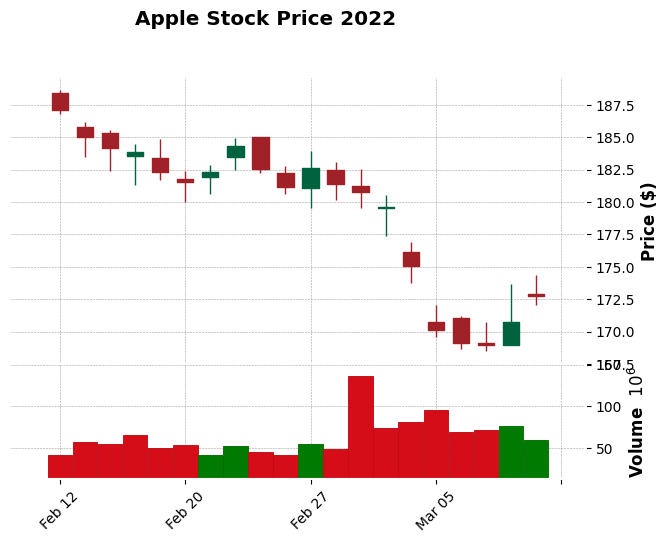

In [9]:
import mplfinance as mpf
# 캔들스틱 차트 설정 및 그리기
mpf.plot(df, type='candle', style='charles',
         title='Apple Stock Price',
         ylabel='Price ($)',
         volume=True)